<h3>Usando la Clase SMABacktester</h3>
En esta lección se va a usar una clase para probar diferentes estrategias con SMA.
La clase está declarada en el script SMABacktester.py, hay que anotar que tuve que editar la línea que establece el estilo de plt.style.use("seaborn") a plt.style.use("seaborn-v0_8-whitegrid).
Este archivo del script debe residir en el mismo directorio donde reside el notebook.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8-whitegrid")

In [2]:
df = pd.read_csv("forex_pairs.csv", parse_dates = ["Date"], index_col = "Date")
df

,AUDEUR=X,EURUSD=X,USDGBP=X
Date,,,
2004-01-01,0.59780,1.258194,0.56016
2004-01-02,0.60314,1.258194,0.55751
2004-01-05,0.60467,1.268698,0.55334
2004-01-06,0.60350,1.272103,0.54906
2004-01-07,0.60728,1.264095,0.55012
...,...,...,...
2020-06-24,0.61349,1.131235,0.79841
2020-06-25,0.60938,1.125087,0.80561
2020-06-26,0.61373,1.122208,0.80480


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4295 entries, 2004-01-01 to 2020-06-30
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   AUDEUR=X  4274 non-null   float64
 1   EURUSD=X  4275 non-null   float64
 2   USDGBP=X  4287 non-null   float64
dtypes: float64(3)
memory usage: 134.2 KB


In [4]:
# se importa la librería de backtesting
import SMABacktester as SMA

In [5]:
"""Se define un backtester y se inicializan los parámetros que incluyen:
El instrumento EURUSD=X, los períodos corto y largo de las medias móviles y el rango de fechas"""

tester = SMA.SMABacktester("EURUSD=X", 50, 200, "2004-01-01", "2020-06-30")

In [6]:
tester

SMABacktester(symbol = EURUSD=X, SMA_S = 50, SMA_L = 200, start = 2004-01-01, end = 2020-06-30)

In [7]:
#Ahora se prueba la estrategia de trading con los parámetros definidos
tester.test_strategy()

(np.float64(1.2835), np.float64(0.367674))

In [8]:
tester.results

,price,returns,SMA_S,SMA_L,position,strategy,creturns,cstrategy
Date,,,,,,,,
2004-10-07,1.229906,0.001475,1.221840,1.226081,-1,-0.001475,1.001476,0.998526
2004-10-08,1.241003,0.008982,1.222628,1.225995,-1,-0.008982,1.010511,0.989598
2004-10-11,1.238405,-0.002095,1.223352,1.225843,-1,0.002095,1.008396,0.991673
2004-10-12,1.232104,-0.005102,1.223888,1.225643,-1,0.005102,1.003265,0.996746
2004-10-13,1.234903,0.002270,1.224466,1.225497,-1,-0.002270,1.005545,0.994486
...,...,...,...,...,...,...,...,...
2020-06-24,1.131235,0.002892,1.101794,1.103430,-1,-0.002892,0.921130,1.271272
2020-06-25,1.125087,-0.005449,1.102486,1.103540,-1,0.005449,0.916125,1.278218
2020-06-26,1.122208,-0.002562,1.103213,1.103627,-1,0.002562,0.913781,1.281497


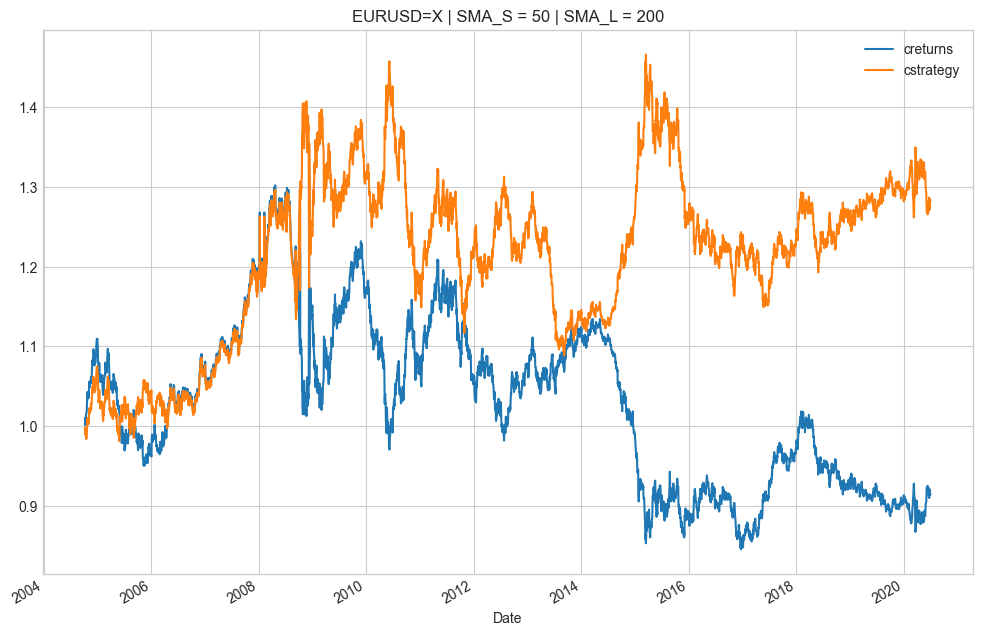

In [9]:
tester.plot_results()

In [10]:
# Vamos a probar con otros parámetros
tester.set_parameters(22, 100)

In [11]:
tester.test_strategy()

(np.float64(1.165483), np.float64(0.228524))

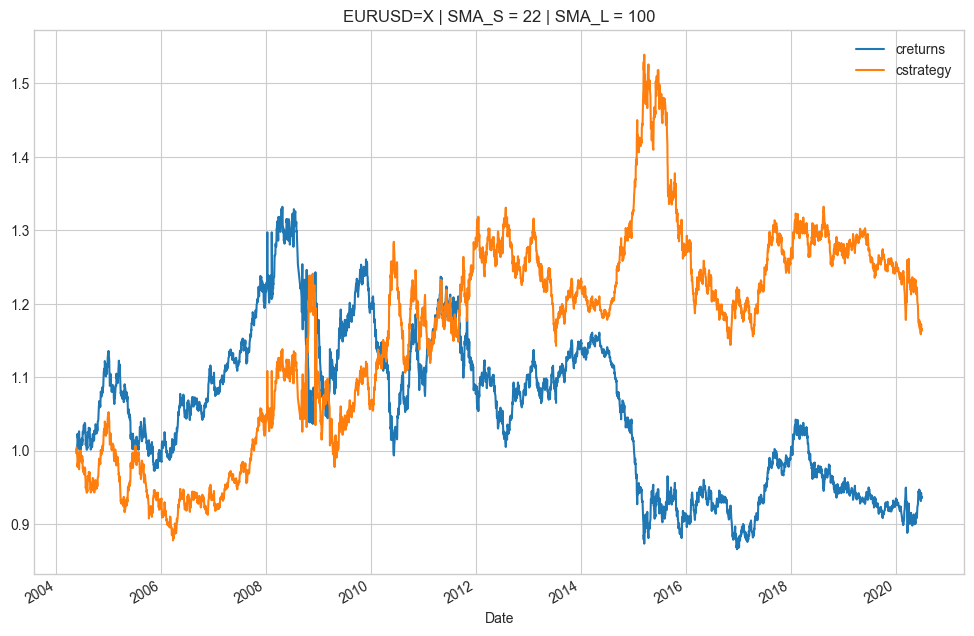

In [12]:
tester.plot_results()

In [13]:
"""Con la clase SMABactester se pueden optimizar los parámetros de la estrategia para ello se le pasan los 
rangos deseados de los períodos corto y largo y el número de pasos"""

tester.optimize_parameters((25, 50, 1), (100, 200, 1))

(array([ 46., 137.]), np.float64(2.526694))

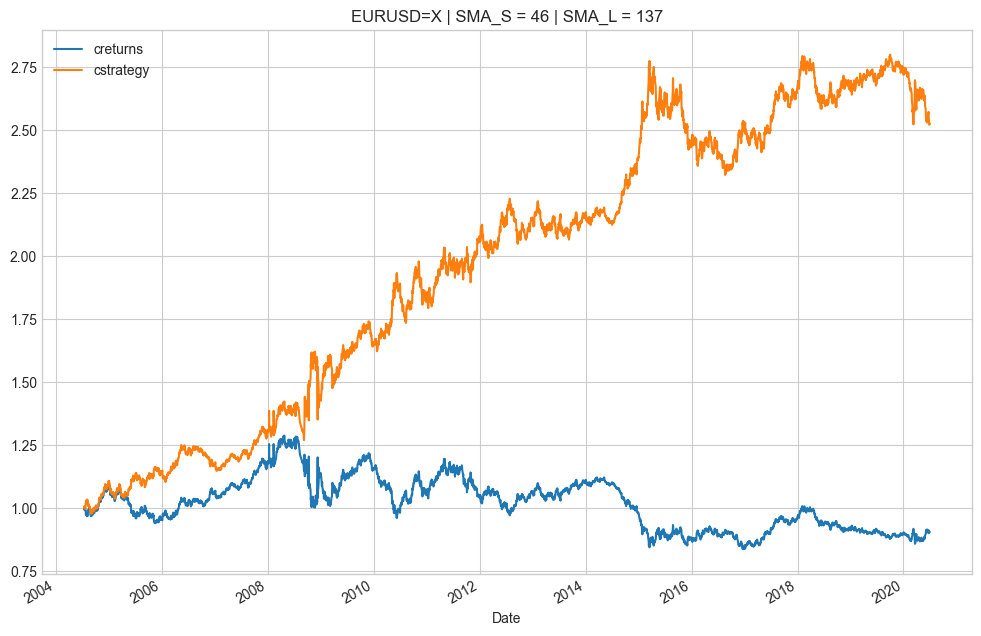

In [14]:
tester.plot_results()

Como se dijo en una lección anterior siempre que se ajuste o se optimice una estrategia con datos históricos, entonces el backtesting puede ser un poco peligroso.  
Pero ahora, con esta clase backtester es muy sencillo optimizar nuestra estrategia basada en un lapso de tiempo específico, por ejemplo, de 2004 a 2015.  
Para ello, entonces, se va a crear un backtester de entrenamiento, de tal manera, que entrenamos nuestra estrategia basada en ese lapso de tiempo y la optimizamos. 


In [15]:
train = SMA.SMABacktester("EURUSD=X", 50, 200, "2004-01-01", "2015-12-31")

In [16]:
train.optimize_parameters((25, 50, 1), (100, 200, 1))

(array([ 46., 137.]), np.float64(2.440535))

Así, la estrategia óptima para el lapso de 2004 a 2015 también arroja los valores 46 y 137
para las SMA corta y larga y el resultado de nuestro backtest es un rendimiento absoluto de 2.44.

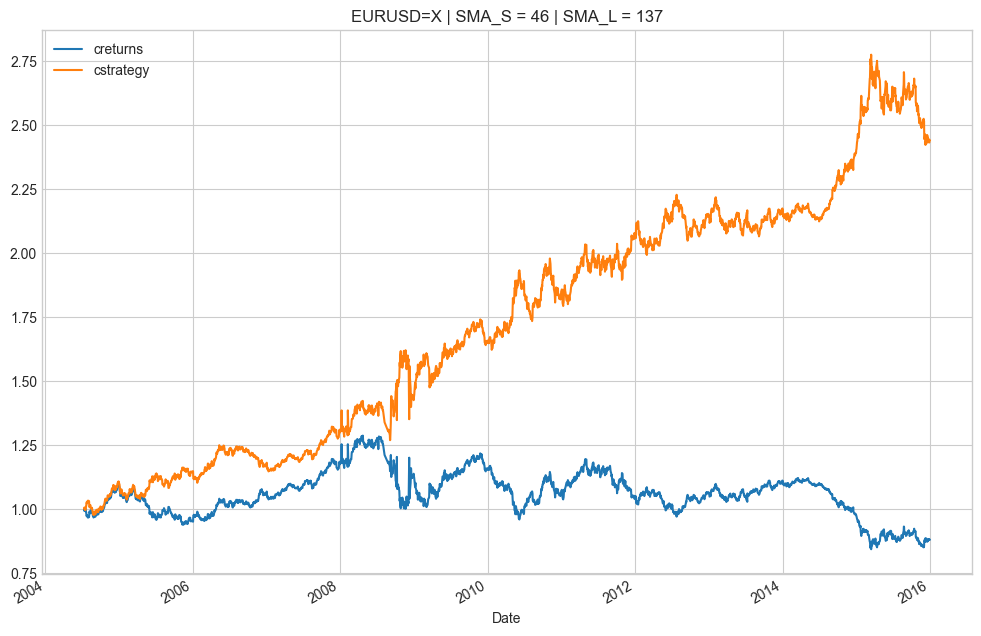

In [17]:
# graficando los resultados de la optimización del entrenamiento
train.plot_results()


Pero ahora resulta más significativo realizar una prueba a futuro, por lo que creamos un nuevo objeto de backtest (lo llamamos nuevamente tester).  
Lo probamos con el mismo instrumento EURUSD=X con los períodos obtenidos anteriormente pero con datos nuevos y actualizados.

In [18]:
tester = SMA.SMABacktester("EURUSD=X", 46, 137, "2016-01-01", "2020-06-30")

In [19]:
tester.test_strategy()

(np.float64(1.056731), np.float64(0.038331))

El resultado de probar la estrategia con valores optimizados para un lapso de tiempo (train data) y luego hacer un backtest con datos de otro lapso de tiempo diferente (test data) arrojó un rendimiento absoluto de solo 1.05 y el rendimiento general de solo 3.83%

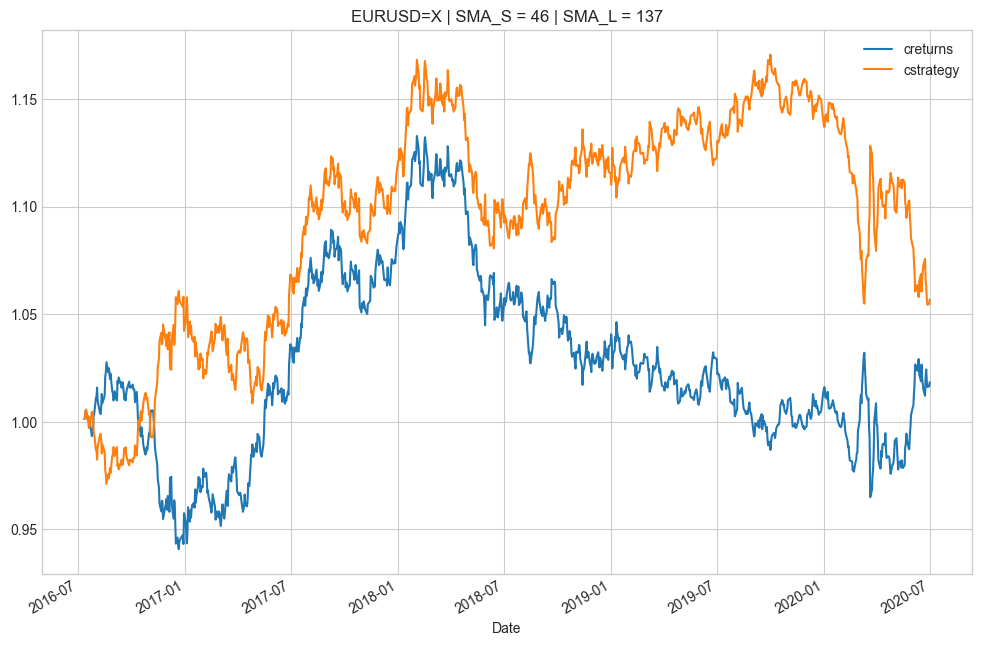

In [20]:
#graficando estos reultados
tester.plot_results()

Analizando la gráfica de los resultados de nuestra prueba con datos a futuro todavía encontramos, en el período considerado, un rendimiento superior a B/H, no obstante, este es menos significativo que el obtenido en el período de entrenamiento y esto es un hallazgo y una regla importante en inversión y finanzas que nos lleva a establecer que "una estrategia que funcionó en el pasado no necesariamente funcionará también en el futuro"

A continuación vamos a cambiar el instrumento a AUDUSD y hagamos un backtest, comenzando con períodos de  50 200 para el lapso de 2004 a 2020.



In [21]:
#definiendo un nuevo backtest con un un instrumento diferente
tester = SMA.SMABacktester("AUDEUR=X", 50, 200, "2004-01-01", "2020-06-30")

In [22]:
tester.test_strategy()

(np.float64(1.145599), np.float64(0.106464))

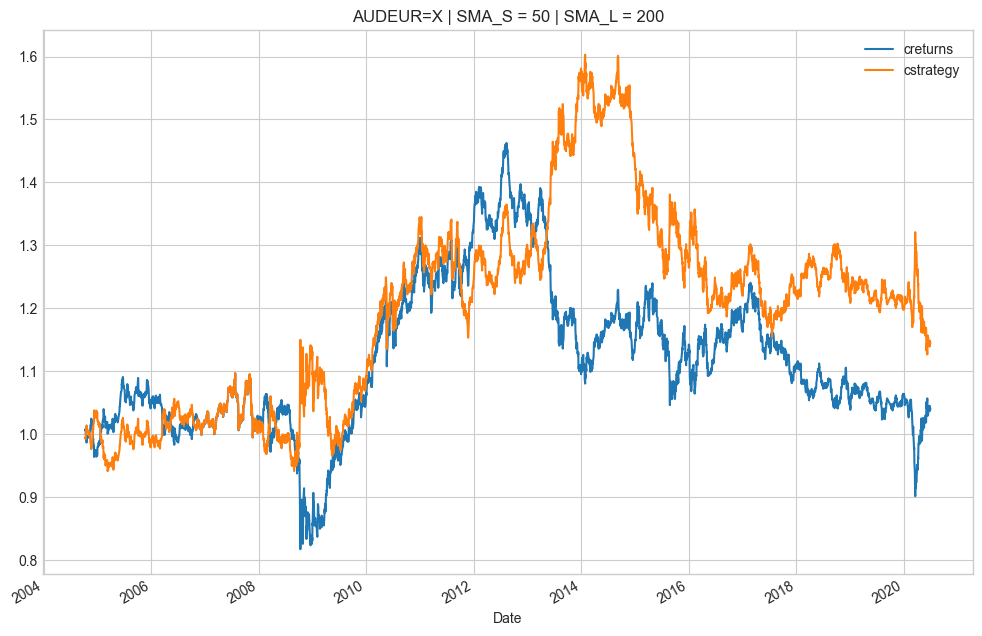

In [23]:
tester.plot_results()

La estrategia aplicada al nuevo instrumento AUDEUR arroja 1.14 y un sobrerendimiento de 10 puntos porcentuales. Del gráfico se desprende que la estrategia no es realmente fiable y que el sobrerendimiento que se crea aquí es en el 2014.

A continuación podemos optimizar los parámetros:

In [24]:
tester.optimize_parameters((25, 50, 1), (100, 200, 1))

(array([ 33., 197.]), np.float64(1.457339))

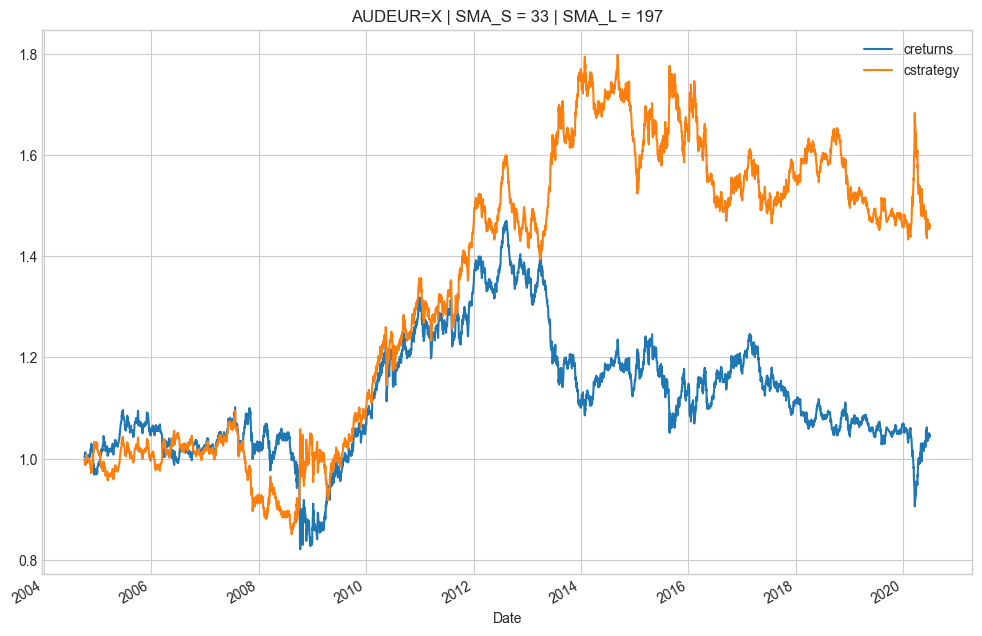

In [25]:
# se grafican los resultados de la optimización
tester.plot_results()

Entonces para el instrumento AUDUSD la estrategia óptima es 33 y 197 y el rendimiento absoluto es solo de 1.45.  
De la gráfica se puede ver que esta estrategia no parece nada confiable y el rendimiento superior aparece principlamente entre 2013 y 2014.  

En resumen, tenemos dos hallazgos clave: un rendimiento superior en el pasado no garantiza un rendimiento superior en el futuro, y una estrategia que funciona para un instrumento no necesariamente funciona para otros.

Por lo tanto, nuestro backtester de SMA de activos es realmente útil y eficiente a la hora de realizar backtesting de muchas estrategias SMA.  

En próximas lecciones desarrollaremos paso a paso la clase backtester.